# Simple network creation

This example creates a striatal network of 100 dSPN and 100 iSPN neurons. You can also do this using the command line interface, see "snudda -h".

This notebook is started in the ```Snudda/snudda/examples/notebooks``` directory, as all paths are given relative to there.

First we create a ```network-config.json``` file in ```networks/simple_example``` which is a subdirectory to the ```notebooks``` directory. The 200 neurons are placed inside a cube, with cell density 80500 neurons/mm3. The neuron morphologies and parameters are taken from the ```Snudda/snudda/data/neurons/dspn``` and ```ispn``` folders.

Here we have set the ```random_seed``` to ```12345```.

In [1]:
import os
from snudda import SnuddaInit

network_path = os.path.join("networks","simple_example")
si = SnuddaInit(network_path=network_path, random_seed=12345, snudda_data="/home/hjorth/HBP/BasalGangliaData/data/")
si.define_striatum(num_dSPN=100, num_iSPN=100, num_FS=0, num_LTS=0, num_ChIN=0,
                    volume_type="cube", neurons_dir="$DATA/neurons")
si.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
Adding neurons: dSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/ispn
Writing networks/simple_example/network-config.json


This reads in the network-config.json file and places the dSPN and iSPN neurons within the cube volume, then writes the positions to the network-neuron-positions.hdf5 file.

In [2]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data/ from networks/simple_example/network-config.json


In [3]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path)
sd.detect()

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data/ from networks/simple_example/network-config.json
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 36/125 (200 neurons)
Processing hyper voxel : 31/125 (200 neurons)
Processing hyper voxel : 32/125 (194 neurons)
Processing hyper voxel : 37/125 (181 neurons)
Processing hyper voxel : 56/125 (173 neurons)
Processing hyper voxel : 61/125 (149 neurons)
Processing hyper voxel : 57/125 (115 neurons)
Processing hyper voxel : 62/125 (102 neurons)
Processing hyper voxel : 6/125 (97 neurons)
Processing hyper voxel : 11/125 (81 neurons)
Processing hyper voxel : 30/125 (73 neurons)
Processing hyper voxel : 7/125 (62 neurons)
Processing hyper voxel : 12/125 (50 neurons)
Processing hyper voxel : 35/125 (49 neurons)
Processing hyper voxel : 26/125 (33 neurons)
Processing hyper voxel : 41/125 (23 neurons)
Processing hyper voxel : 27/125 (23 neurons)
Processing hyper voxel : 60/125 (22 neurons)
Processing hyper 

Prune the synapses in the network based on the connection information in the ```network-config.json``` file.

In [4]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

No file networks/simple_example/pruning_merge_info.json
Read 469994 out of total 469994 synapses


Use matplotlib to plot the network. Note that this can be quite slow for larger networks.

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data/ from networks/simple_example/network-config.json


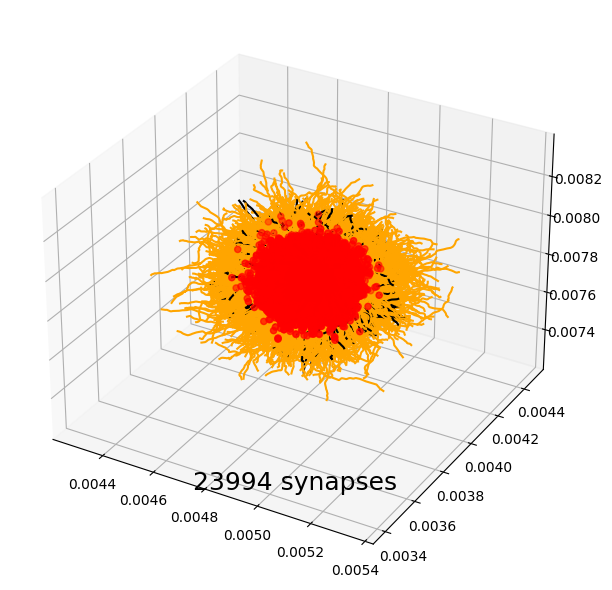

In [5]:
from snudda.plotting import PlotNetwork
pn = PlotNetwork(network_path)
pn.plot()
pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)